# The Bootstrap
## Foundations of Machine Learning
## `! git clone https://www.github.com/DS3001/the_bootstrap`

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [18]:
! git clone https://www.github.com/DS3001/the_bootstrap

fatal: destination path 'the_bootstrap' already exists and is not an empty directory.


## The Bootstrap
- Last time, we covered iid sequences and the weak law of large numbers
- This lead us towards simulation as a means of understanding random variables computationally, rather than analytically
- In data science, we just have the data we have, we can't really get new data without going back to the field, right?
- Or can we? (We can, actually)

## The Cumulative Distribution Function
- Last class, we used only a primitive thing called a probability function, $pr(e)$, that gave the probability of event $e$. This allowed us to get all the way to the Law of Large numbers for any random variable $R$ that has a mean $\mu_R$ and a variance $\sigma_R^2$
- Probability theory usually starts from a different place: Describing how a random variable $R$ is *distributed* over the values it takes
- The *cumulative distribution function* or CDF is defined as
$$
F(x) = pr[R\le x]
$$
For any number $x$, this gives the probability that the random variable $R$ takes values below $x$. It is increasing, since as $x$ goes up, the number of values $R$ for which $R\le x$ gets larger. It is bounded below by 0 and above by 1, since it is a probability.

## The Probability Function of the Sum of Two Dice
- The sample space is:
$$
\left[ \begin{array}{cccccc}
(1\cdot,1\cdot) & (1\cdot,2\cdot) & (1\cdot,3\cdot) & (1\cdot,4\cdot) & (1\cdot,5\cdot) & (1\cdot,6\cdot) \\
(2\cdot,1\cdot) & (2\cdot,2\cdot) & (2\cdot,3\cdot) & (2\cdot,4\cdot) & (2\cdot,5\cdot) & (2\cdot,6\cdot) \\
(3\cdot,1\cdot) & (3\cdot,2\cdot) & (3\cdot,3\cdot) & (3\cdot,4\cdot) & (3\cdot,5\cdot) & (3\cdot,6\cdot) \\
(4\cdot,1\cdot) & (4\cdot,2\cdot) & (4\cdot,3\cdot) & (4\cdot,4\cdot) & (4\cdot,5\cdot) & (4\cdot,6\cdot) \\
(5\cdot,1\cdot) & (5\cdot,2\cdot) & (5\cdot,3\cdot) & (5\cdot,4\cdot) & (5\cdot,5\cdot) & (5\cdot,6\cdot) \\
(6\cdot,1\cdot) & (6\cdot,2\cdot) & (6\cdot,3\cdot) & (6\cdot,4\cdot) & (6\cdot,5\cdot) & (6\cdot,6\cdot)
\end{array} \right]
$$
- We're interested in the sum of the two die $(d_1,d_2)$ as our random variable, $R = d_1 + d2$, and the probability function and CDF, $F_R(x) = pr[d_1 + d_2 \le x]$

[ 2  3  4  5  6  7  8  9 10 11 12]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.027777777777777776
0.027777777777777776
0.027777777777777776
0.027777777777777776
0.027777777777777776
0.027777777777777776
0.05555555555555555
0.05555555555555555
0.05555555555555555
0.05555555555555555
0.05555555555555555
0.027777777777777776
0.08333333333333333
0.08333333333333333
0.08333333333333333
0.08333333333333333
0.05555555555555555
0.027777777777777776
0.1111111111111111
0.1111111111111111
0.1111111111111111
0.08333333333333333
0.05555555555555555
0.027777777777777776
0.1388888888888889
0.1388888888888889
0.1111111111111111
0.08333333333333333
0.05555555555555555
0.027777777777777776
0.16666666666666669
0.1388888888888889
0.1111111111111111
0.08333333333333333
0.05555555555555555
0.027777777777777776


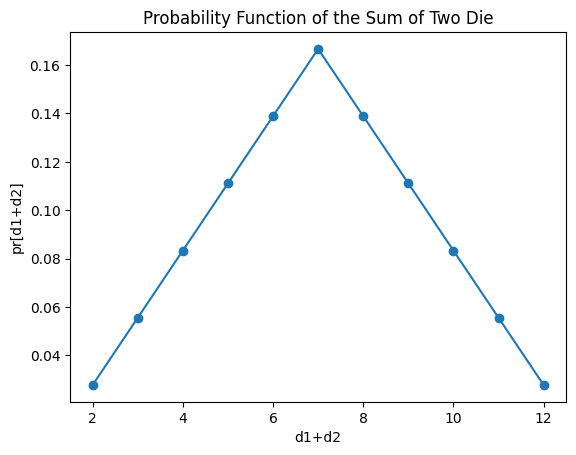

,sum,pr
0,2,0.027778
1,3,0.055556
2,4,0.083333
3,5,0.111111
4,6,0.138889
5,7,0.166667
6,8,0.138889
7,9,0.111111
8,10,0.083333
9,11,0.055556


In [19]:
D = [1,2,3,4,5,6]
pr = np.zeros(11) #prints up 12 zeroes so start out
R = np.arange(2,13,1)
print(R)
print(pr)
for i in range(6):
    for j in range(6):
        pr[i+j] = pr[i+j]+1/36
        print(pr[i+j])

plt.scatter(R,pr)
plt.plot(R,pr)
plt.xlabel("d1+d2")
plt.ylabel("pr[d1+d2]")
plt.title('Probability Function of the Sum of Two Die')
plt.show()

df = pd.DataFrame({'sum':R,'pr':pr})
df

Below is the cdf of the above function:

[0.02777778 0.08333333 0.16666667 0.27777778 0.41666667 0.58333333
 0.72222222 0.83333333 0.91666667 0.97222222 1.        ]


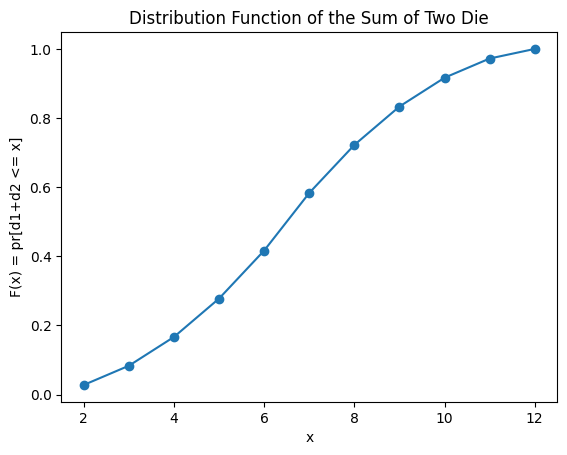

,x,F
0,2,0.027778
1,3,0.083333
2,4,0.166667
3,5,0.277778
4,6,0.416667
5,7,0.583333
6,8,0.722222
7,9,0.833333
8,10,0.916667
9,11,0.972222


In [20]:
F = np.cumsum(pr) # Cumulative summation of p
print(F)

plt.scatter(R,F)
plt.plot(R,F)
plt.xlabel("x")
plt.ylabel("F(x) = pr[d1+d2 <= x]")
plt.title('Distribution Function of the Sum of Two Die')
plt.show()

df = pd.DataFrame({'x':R,'F':F})
df


[-3.         -2.79310345 -2.5862069  -2.37931034 -2.17241379 -1.96551724
 -1.75862069 -1.55172414 -1.34482759 -1.13793103 -0.93103448 -0.72413793
 -0.51724138 -0.31034483 -0.10344828  0.10344828  0.31034483  0.51724138
  0.72413793  0.93103448  1.13793103  1.34482759  1.55172414  1.75862069
  1.96551724  2.17241379  2.37931034  2.5862069   2.79310345  3.        ]


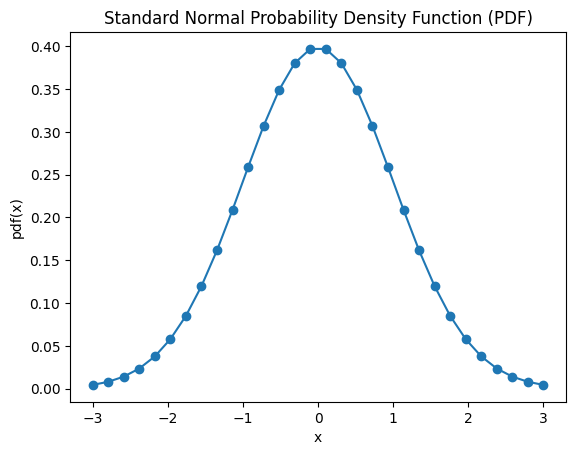

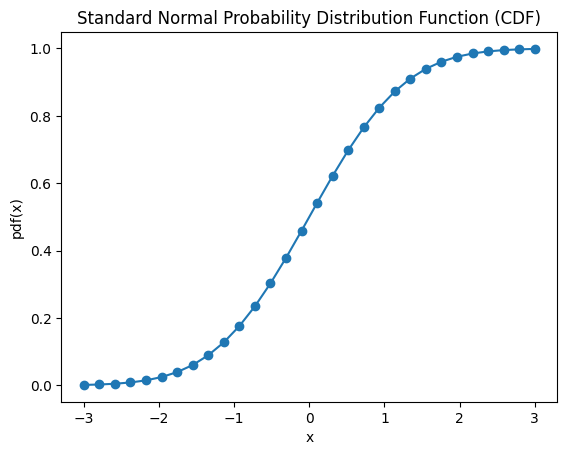

In [21]:
from scipy.stats import norm

grid = np.linspace(-3,3,30)
print(grid)
pdf = norm.pdf(grid)
cdf = norm.cdf(grid)

plt.scatter(grid,pdf) #x,y
plt.plot(grid,pdf)  #x,y
plt.xlabel("x")
plt.ylabel("pdf(x)")
plt.title('Standard Normal Probability Density Function (PDF)')
plt.show()

plt.scatter(grid,cdf)
plt.plot(grid,cdf)
plt.xlabel("x")
plt.ylabel("pdf(x)")
plt.title('Standard Normal Probability Distribution Function (CDF)')
plt.show()


## The Empirical CDF
- How do we model a distribution function $F$ using data?
- Let $L(x_i,x)=1$ if $x_i \le x$ and 0 if $x_i>x$; "if $x_i$ is **L**ess than $x$, then $L$ equals 1, and $L$ equals 0 otherwise"
- The *empirical cumulative distribution function* (ECDF) is
$$
F_n(x) = \dfrac{1}{n} \sum_{i=1}^n L(x_i,x)
$$
- This is just a sample proportion for each $x$; this is a cousin of the histogram (representing the distribution function rather than the density function)
- **Holding $x$ fixed, the LLN implies that $F_n(x)$ converges in probability to the true $F(x)$ as our sample size $n$ gets large**
- **We can use the ECDF and the LLN to estimate distributions of random variables**: It's not just statistics like the mean or variance, it's the whole distribution of the random variable

[ 5  3  8 11 10  8 10  8  6  6  7  7  4 10  4  9  2  8  7  3  8  6  5  5
  9 10  6  3  7  4  7  2  3  5  7  6  5 10  5  6  4  8  6  5  6  9  5  7
  5  7  3  5  9  5  5  9  9 11  8  7  7  7  3  9  8  7  2  8  6  8  4  4
  8 10  8  5  8  6  6  6  9  7  9  8  9  4  6  8  7  4  5 10  7  9  2  9
  4 10  6 11  7 10  7 10  4  9  7  9  3  2  7  8  8  6  7  4  6  4  9 12
 12  4  9 11 11  7  5  8  4  8 10  8  2  8  9 10  6  7  9  6  7  9  5  3
  5  8  9  9  5  3]


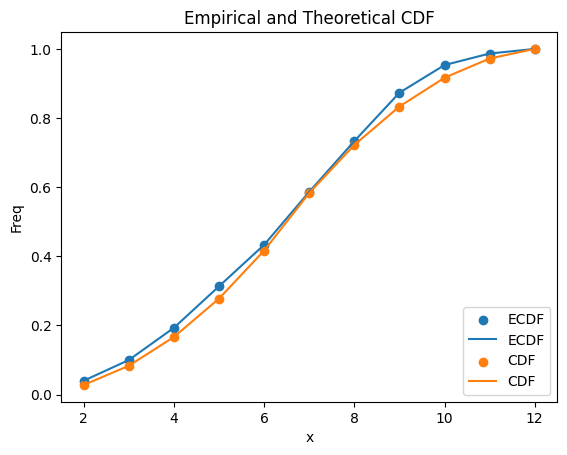

In [22]:
## ECDF, Dice Example, 50 rolls

R = np.arange(2,13,1)
faces = np.array([1,2,3,4,5,6])
N = 150
d1 = np.random.choice(faces, size=N)
d2 = np.random.choice(faces, size=N)
roll = d1+d2 #adds each value together for each respective index)
print(roll)
ecdf = np.zeros(11)

for i in range(11):
    ecdf[i] = (1/N)*np.sum( roll <= R[i] )
    """The line np.sum( roll <= R[i] ) is using NumPy's vectorized operations to
        perform a comparison across each element of the array roll and summing the results.
        Here's a step-by-step explanation:
          roll <= R[i]: This expression creates a boolean array where each element of the array roll is compared to
          the value R[i]. If an element in roll is less than or equal to R[i], the corresponding element in the new
          boolean array is True (equivalent to 1); otherwise, it is False (equivalent to 0).

          np.sum(...): The np.sum function calculates the sum of the elements in the boolean array. Since True is equivalent
          to 1 and False is 0, the sum is effectively counting how many times the condition (roll value ≤ R[i]) is met."""

plt.scatter(R,ecdf,label='ECDF')
plt.plot(R,ecdf,label='ECDF')
plt.scatter(R,F,label='CDF')   #from earlier: F = np.cumsum(pr)  == Cumulative summation of p
plt.plot(R,F,label='CDF')
plt.xlabel("x")
plt.ylabel("Freq")
plt.legend(loc='lower right')
plt.title('Empirical and Theoretical CDF')
plt.show()


## Seaborn
- To make an ECDF plot in seaborn, you can use the `sns.ecdfplot(data,x)` function
  

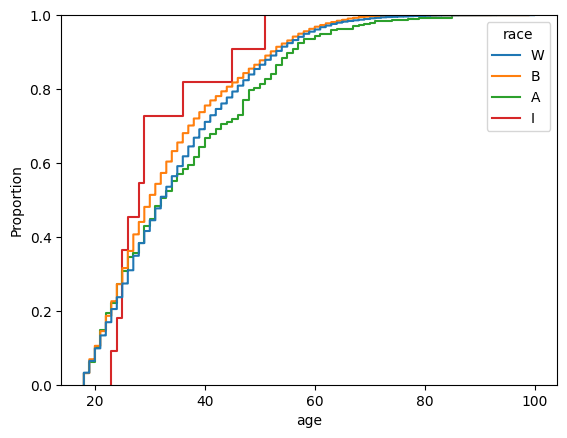

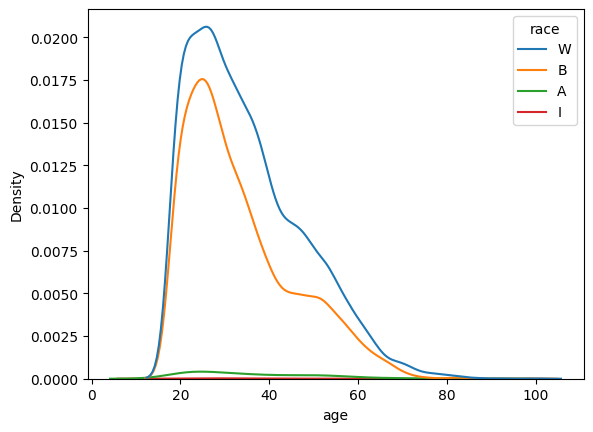

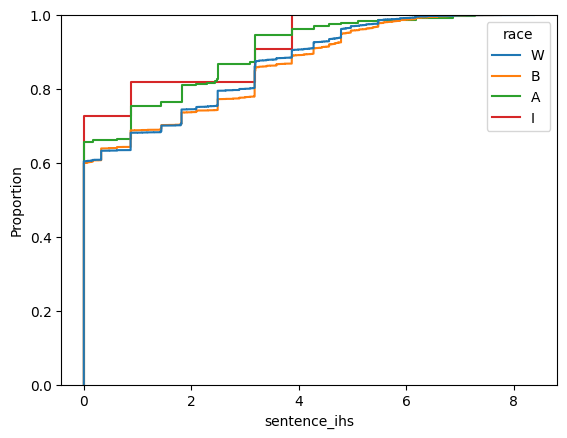

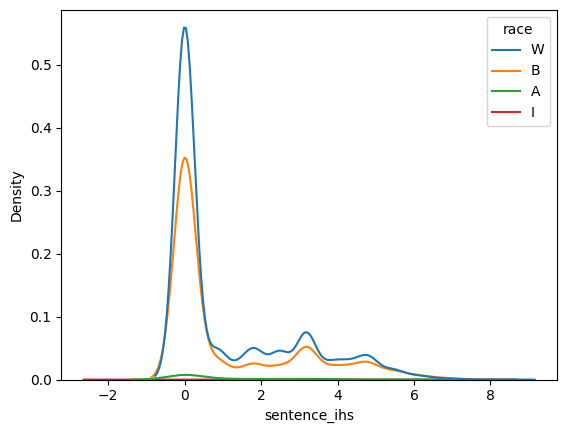

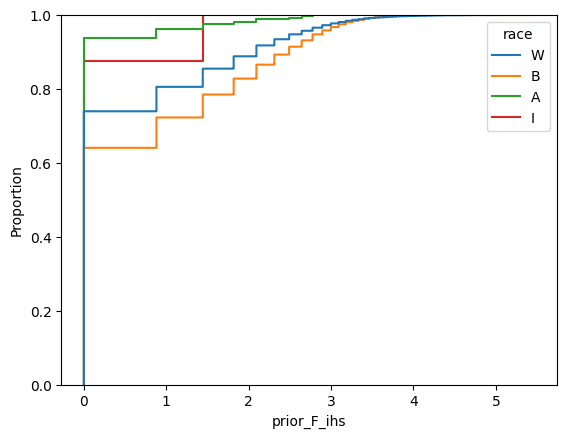

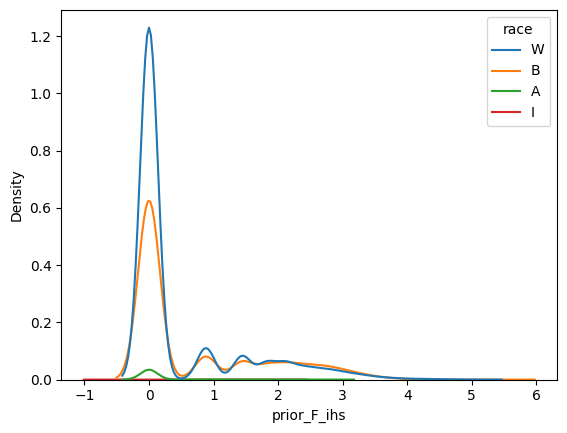

,Unnamed: 0,case_type,age,sex,race,is_poor,bond,bond_type,prior_F,prior_M,gini,released,sentence_type,sentence,bond_NA,held_wo_bail,sentence_NA,sentence_ihs,prior_F_ihs
0,0,F,31.0,M,W,NaN,NaN,7,0.0,0.0,0.44,NaN,NaN,NaN,True,False,True,NaN,0.000000
1,1,F,60.0,M,B,NaN,NaN,7,13.0,21.0,0.44,0.0,0.0,60.000000,True,False,False,4.787561,3.259573
2,2,M,27.0,M,W,NaN,NaN,7,0.0,0.0,0.44,0.0,1.0,12.000000,True,False,False,3.179785,0.000000
3,3,M,27.0,M,B,0.0,NaN,7,0.0,9.0,0.44,0.0,1.0,0.985626,True,False,False,0.871173,0.000000
4,4,F,28.0,F,W,0.0,NaN,7,0.0,0.0,0.44,1.0,4.0,0.000000,True,False,True,0.000000,0.000000


In [24]:
## ECDF Example: Pretrial Data

ldf = pd.read_csv('the_bootstrap/data/pretrial_data.csv')
ldf['sentence_ihs'] = np.arcsinh(ldf['sentence'])  #arcsin transformations
ldf['prior_F_ihs'] = np.arcsinh(ldf['prior_F'])

sns.ecdfplot(data=ldf,x='age',hue='race')
plt.show()

sns.kdeplot(data=ldf,x='age',hue='race')
plt.show()

sns.ecdfplot(data=ldf,x='sentence_ihs',hue='race')
plt.show()

sns.kdeplot(data=ldf,x='sentence_ihs',hue='race')
plt.show()

sns.ecdfplot(data=ldf,x='prior_F_ihs',hue='race')
plt.show()

sns.kdeplot(data=ldf,x='prior_F_ihs',hue='race')
plt.show()

ldf.head()

## Quantiles and the CDF
- On the $y$ axis, there are numbers between 0 and 1. On the $x$ axis, there are the range of values that the data take.
- To get the $q$ quantile, you trace the $q/100$ value from the $y$ axis to the graph, then down to the $x$ axis
- The median sentence is 12 days; the 75th quantile for Black and white defendants is about 36 days
- This shows how the data are spread out in a slightly different way than a kernel density plot
- We will need to be able to get these values from a vector of values in a minute
- (The quantile function is the inverse of the empirical CDF function)

## Getting the Quantiles in Python
- You can use `df.quantile(q)` to get a list `q` of quantiles

In [ ]:
# Quantiles overall:
print( ldf['sentence'].quantile(q=[.10,.25,.5,.75,.9]) )

# By groups:
print( ldf['sentence'].groupby(ldf['race']).quantile(q=[.10,.25,.5,.75,.9]) )  #quantiles of sentence time organized/grouped by race

## **Big Idea: Bootstrapping**
- Assume the data are iid: Each observation $x_i$ is determined independently of the other observations $x_j$, $j\neq i$
- Suppose we've fit a model, and want to know how uncertain we should be about its performance. In particular, there's some statistic $m$ about which you are interested (e.g. the variance of the predictions, the value of a regression coefficient, the number of clusters that $k$MC picks, etc.)
- We can **bootstrap** the distribution of $m$ as follows: Pick a large number, $S$
  1. Select $n$ observations at random from your data, with replacement, and call this sample $s$
  2. Compute the statistic $m(s)$ for this sample, and store the value, $m_s$
  3. Repeat steps 1--2  for $t=1,2,...,S$, and then compute the ECDF for the stored values $(m_1, m_2, ..., m_S)$
- If $S$ and $n$ are sufficiently large, $F_{n,S}(m)$ will converge to the true value of $F(m)$

## **What is happening?**
- We typically can't create new data, and this is inconvenient. We have what we have.
- If the data are iid, however, we can *mimic* the process of collecting data by resampling.
- We close our eyes and draw a new sample at random with replacement from the existing data, equal to the size of the original data set
- This is effectively a new sample from the same sample space: It will have different properties and values, and provide different estimates
- We can repeat this process many times, simulating a situation where we *could* create as many datasets as we wanted that have similar properties to the original
- Because of the LLN, the statistics we compute from each bootstrap dataset create an ECDF of $(m_1,...,m_S)$ that gets close to the true CDF of $m$ if (1) the data are really iid, (2) the number of draws $S$ is sufficiently large, and (3) we have a sufficiently large dataset in $n$

## Sex Discrimination in Promotion
- We have data with two things: whether an employee is male or female, and whether they are promoted or not, at a bank in the 1970s
- Here are the cross tabs:

In [ ]:
df = pd.read_csv('the_bootstrap/data/gender_discrimination.csv')
print(df.columns)
print(df.head)
df['promoted'] = 0 #create a new column called "promoted", initially filled with all 0's

df.loc[df['decision']=='promoted','promoted']=1
"""df.loc[df['decision']=='promoted','promoted']=1: This line uses the loc method to locate all
rows where the 'decision' column has the value 'promoted', and sets the value of the 'promoted'
column in those rows to 1. Essentially, it's encoding the 'decision' column into a new binary column
 where 1 indicates a promotion."""

pd.crosstab(df['gender'],df['decision'])

- The male promotion rate is 21/24=.875 and the female promotion rate is 14/24=.56. Seems biased.
- But there's only 24 people in each group, and if it were, instead, 19/24 and 17/24, it would look much less biased.
- Can we quantify our uncertainty about these estimates, based on the data?
- To be precise, let's focus on the difference between the male and female promotion rates, and bootstrap its distribution

female_0:  0.5833333333333334
male_0:  0.875
-0.29166666666666663


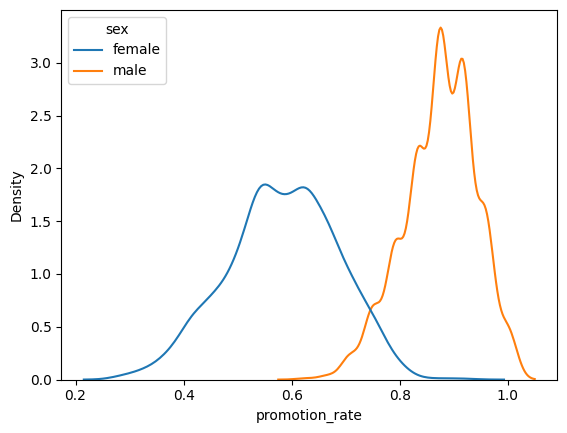

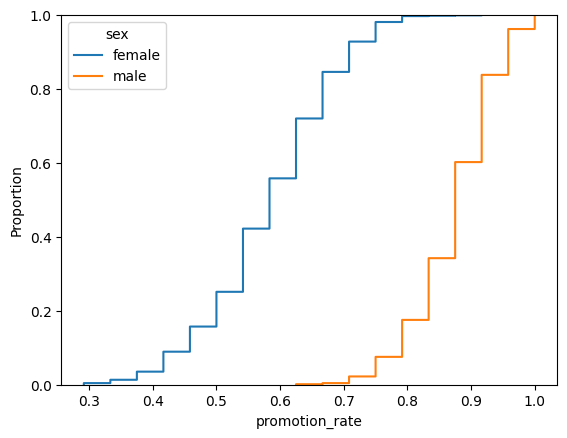

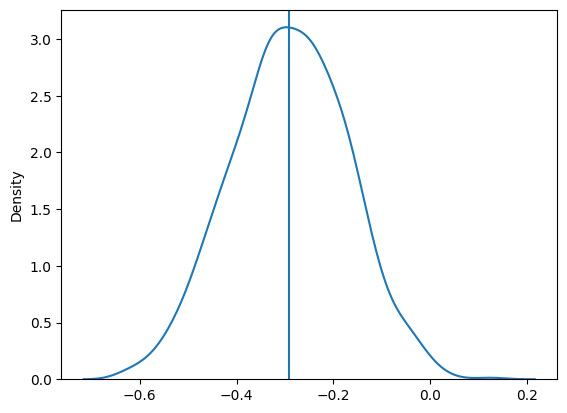

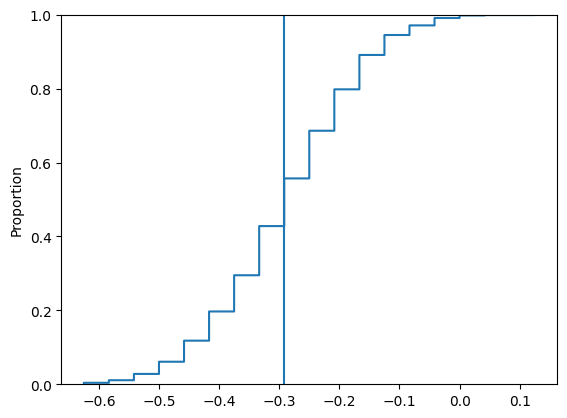

In [34]:
# Full sample promotion averages and difference:
female_0 = df.loc[ df['gender'] =='female', 'promoted' ].mean()
male_0 = df.loc[ df['gender'] =='male', 'promoted' ].mean()
diff_0 =  female_0 - male_0
print("female_0: ", female_0)
print("male_0: ", male_0)
print(diff_0)

# Female data:
df_f = df.loc[ df['gender'] =='female', 'promoted' ]
"""df['gender'] =='female': This part creates a boolean array that is True where the 'gender'
column of df has the value 'female'. So, for every row in the DataFrame, if the 'gender' is 'female',
 the corresponding value in the boolean array is True, otherwise it is False.

df.loc[ ..., 'promoted' ]: The .loc method is then used to select rows and a single column from df.
The boolean array from step 1 is used to select only those rows where the condition is True (i.e.,
the gender is 'female'), and the column specified is 'promoted'.

df_f = ...: The result of the .loc method, which is a pandas Series containing the 'promoted'
 values for rows where 'gender' is 'female', is assigned to a new variable df_f."""

N_f = df_f.shape[0]
# Male data:
df_m = df.loc[ df['gender'] =='male', 'promoted' ]
N_m = df_m.shape[0]

# Simulation:
S = 1000
rate_F = np.zeros(S) # Female promotion rate
rate_M = np.zeros(S) # Male promotion rate
diff = np.zeros(S)  # Difference in promotion rates

# Bootstrapping:
for s in range(S):
    sample_F = df_f.sample(N_f,axis=0,replace=True) # Resample women
    rate_F[s] = sample_F.mean() # Mean promotion rate, women
    sample_M = df_m.sample(N_m,axis=0,replace=True) # Resample men
    rate_M[s] = sample_M.mean() # Mean promotion rate, men
    diff[s] = rate_F[s]-rate_M[s] # Difference in rates

# Combine male and female result into one dataframe for plotting:
rdf_F = pd.DataFrame({'sex':'female','promotion_rate':rate_F})
rdf_M = pd.DataFrame({'sex':'male','promotion_rate':rate_M})
rdf = pd.concat([rdf_F,rdf_M],axis=0)

# Density plot of promotion rates:
sns.kdeplot(data=rdf,x='promotion_rate',hue='sex')
plt.show()

# ECDF of promotion rates:
sns.ecdfplot(data=rdf,x='promotion_rate',hue='sex')
plt.show()

# Density plot of differences in rates:
ax = sns.kdeplot(diff)
ax.axvline(x = diff_0)
plt.show()

# ECDF of differences in rates:
ax = sns.ecdfplot(diff)
ax.axvline(x = diff_0)
plt.show()


## Communicating Uncertainty: Confidence Intervals
- When we have a bootstrapped distribution, it is nice to convert the picture into numbers
- People often report an *$\alpha$% confidence interval*, which is the $(1-\alpha)/2$-quantile and the $[1-(1-\alpha)/2]$-quantile, where $\alpha$ is usually 90 [5th and 95th quantiles], 95 [2.5th and 97.5th quantiles], or 99 [.05th and 99.5th quantiles]
- This means: "If $n$ and $S$ are sufficiently large and the data are iid: $m$ will be in this interval for $\alpha$-percent of all the samples you might draw"
- This is used as a "reductio ad absurdum" argument: If values like 0 are outside the confidence interval, such a value seems inconsistent with the data we have available

## Confidence Interval Plot
- Let's look at a 10% confidence interval for the discrimination example
- For a 10% confidence interval, 10%/2 = 5% goes in each "tail", corresponding to the .05 and .95 quantiles
- We are then curious: Is 0 inside the confidence interval?

In [ ]:
CI = np.quantile(diff,[.05,.95]) # Compute 90% CI
print('Point Estimate: ', diff_0)
print( 'CI: ' + str(CI) )

# Density plot of differences in rates, CI:
ax = sns.kdeplot(diff)
ax.axvline(x = diff_0,linestyle='dashed',color='green') # Point estimate
ax.axvline(x = CI[0],linestyle='dashed',color='red') # Lower bound
ax.axvline(x = CI[1],linestyle='dashed',color='red') # Upper bound
plt.show()

# ECDF of differences in rates, CI:
ax = sns.ecdfplot(diff)
ax.axvline(x = diff_0,linestyle='dashed',color='green') # Point estimate
ax.axvline(x = CI[0],linestyle='dashed',color='red') # Lower bound
ax.axvline(x = CI[1],linestyle='dashed',color='red') # Upper bound
plt.show()


## Interpreting a Confidence Interval
- What does this mean?
- In 90% of the Bootstrap samples, the estimated difference was between -.458 and -.083
- Zero is outside that interval, so we reject the hypothesis that the true value is zero at the 90% level
- What we are saying is: "Given the data (i.e. bootstrapping), it is very unlikely (90%) that men and women are treated equally here"

## Example: Population Comparisons
- General Problem: I have computed two statistics for two populations. They are, of course, numerically different, but these are noisy estimates. Is there evidence in the data that these statistics are (statistically and practically) significantly different?
- Solution: Bootstrap resample both populations many times, recomputing their population statistics and taking the difference each time. Is 0 a point that is in, say, the 90% confidence interval? If no, reject the hypothesis that the populations have the same value; if yes, fail to reject that hypothesis.
- Does CPR "work"?

In [ ]:
df = pd.read_csv('./data/cpr.csv')
df.head()
df['survived'] = 0
df.loc[ df['outcome']=='survived','survived'] = 1

In [ ]:
pd.crosstab(df['group'],df['outcome'])

In [ ]:
# Full sample promotion averages and difference:
df_c = df.loc[ df['group'] =='control', 'survived' ]
N_c = df_c.shape[0]
df_t = df.loc[ df['group'] =='treatment', 'survived' ]
N_t = df_t.shape[0]
diff_0 =  df_t.mean() - df_c.mean()
print(diff_0)

In [ ]:
# Simulation:
S = 1000
rate_c = np.zeros(S) # Control survival rate
rate_t = np.zeros(S) # Treatment survival rate
diff = np.zeros(S)  # Difference in survival rates

# Bootstrapping:
for s in range(S):
    sample_c = df_c.sample(N_c,axis=0,replace=True) # Resample women
    rate_c[s] = sample_c.mean() # Mean promotion rate, women
    sample_t = df_t.sample(N_t,axis=0,replace=True) # Resample men
    rate_t[s] = sample_t.mean() # Mean promotion rate, men
    diff[s] = rate_t[s]-rate_c[s] # Difference in rates

# Determine 90% confidence interval
CI = np.quantile(diff,[.05,.95]) # Compute 90% CI
print('Point Estimate: ', diff_0)
print( 'CI: ' + str(CI) )

# Density plot of differences in rates, CI:
ax = sns.kdeplot(diff)
ax.axvline(x = diff_0,linestyle='dashed',color='green') # Point estimate
ax.axvline(x = CI[0],linestyle='dashed',color='red') # Lower bound
ax.axvline(x = CI[1],linestyle='dashed',color='red') # Upper bound
plt.show()

# ECDF of differences in rates, CI:
ax = sns.ecdfplot(diff)
ax.axvline(x = diff_0,linestyle='dashed',color='green') # Point estimate
ax.axvline(x = CI[0],linestyle='dashed',color='red') # Lower bound
ax.axvline(x = CI[1],linestyle='dashed',color='red') # Upper bound
plt.show()


- So, 0 is inside the 90% confidence interval: We reject the hypothesis that the effect of CPR is statistically significantly different from zero
- Is that crazy?
    - https://www.theatlantic.com/health/archive/2012/07/are-doctors-more-likely-to-refuse-cpr/260381/
    - "Are doctors more likely to refuse revival in the event of cardiac arrest? In the Hopkins study, 90 percent of doctors said they'd rather die by cardiac arrest than be resuscitated."
- I am not saying you should refuse CPR; I am saying the evidence here is ambiguous, and it is worth thinking about
- What's the biggest confidence level that fails to reject the null? Here it is 83% confidence
- People often use $p$-values as the minimum level of the test that indicates rejection instead of confidence levels, or $p=.17 = 1-.83$

In [ ]:
alpha = .17
CI = np.quantile(diff,[alpha/2,(1-alpha/2)]) # Compute 90% CI
print('Point Estimate: ', diff_0)
print( 'CI: ' + str(CI) )

# Density plot of differences in rates, CI:
ax = sns.kdeplot(diff)
ax.axvline(x = diff_0,linestyle='dashed',color='green') # Point estimate
ax.axvline(x = CI[0],linestyle='dashed',color='red') # Lower bound
ax.axvline(x = CI[1],linestyle='dashed',color='red') # Upper bound
plt.show()

# ECDF of differences in rates, CI:
ax = sns.ecdfplot(diff)
ax.axvline(x = diff_0,linestyle='dashed',color='green') # Point estimate
ax.axvline(x = CI[0],linestyle='dashed',color='red') # Lower bound
ax.axvline(x = CI[1],linestyle='dashed',color='red') # Upper bound
plt.show()

## Example: Regression Coefficients
- Problem: I have my data $(y,X)$ and a model $y = b\cdot X$. I want to quantify the uncertainty about the estimated coefficients in the model, say $\hat{b}$.
- Solution: I can resample the data $(y,X)$ and run the regression on each bootstrap sample, creating a sequence of estimates $(\hat{b}^1, \hat{b}^2, ... , \hat{b}^S)$ to see how "noisy" the coefficient $\hat{b}$ is and construct confidence intervals
- We'll use housing price data with house characteristics

## Stats Detour: Central Limit Theorem
- The concept of bootstrapping actually replaces a classic idea in statistics: the Central Limit Theorem or CLT
- Suppose $x_1, x_2, ..., x_n$ is an iid sequence with sample mean $\bar{X}_n = \dfrac{1}{n} \sum_{i=1}^n x_i$. Each $x_i$ has mean $\mu$ and variance $\sigma^2$.
- Then as the sample size gets large, the value of $\sqrt{n}(\bar{X}_n - \mu)$ converges in law to a Normal distribution with mean 0 and variance $\sigma^2$.
- Before computers became as powerful as they are now, the CLT allowed people to approximately test hypotheses
- Bootstrapping provides a data-driven alternative based on probability theory

In [ ]:
df = pd.read_csv('./data/pierce_county_house_sales.csv')
N = df.shape[0]
df.head()

In [ ]:
vars = ["attached_garage_square_feet","attic_finished_square_feet","basement_square_feet","bathrooms",
          "bedrooms","detached_garage_square_feet","fireplaces","house_square_feet",
          "sale_price","stories","year_built"]
df = df.loc[:,vars]
df.head()

In [ ]:
df.describe()

In [ ]:
from sklearn.linear_model import LinearRegression # Import linear regression model

y = df['sale_price']
X = df.drop('sale_price',axis=1)
reg0 = LinearRegression().fit(X, y) # Fit the linear model
names = reg0.feature_names_in_
coef = pd.DataFrame({'variable':names,'coefficient':reg0.coef_})

print('Intercept: ' + str(reg0.intercept_)+'\n') # Intercept value
print('R2: ' + str(reg0.score(X, y) )) # R squared measure

coef

In [ ]:
S = 1000
K = len(names)
slopes = np.zeros([S,K])
intercepts = np.zeros(S)
r2s = np.zeros(S)

# Bootstrap:
for s in range(S):
    df_s = df.sample(N,replace=True,axis=0)
    y_s = df_s['sale_price']
    X_s = df_s.drop('sale_price',axis=1)
    #
    reg_s = LinearRegression().fit(X_s, y_s)
    slopes[s,:] = reg_s.coef_.tolist()
    intercepts[s] = reg_s.intercept_
    r2s[s] = reg_s.score(X_s,y_s)

In [ ]:
def CI_eval(var): # Uncertainty analysis for var
    CI = np.quantile(var,[.05,.95]) # Compute 90% CI
    print('Point Estimate: ', var.mean())
    print( 'CI: ' + str(CI) )
    # Density plot of differences in rates, CI:
    ax = sns.kdeplot(var)
    ax.axvline(x = var.mean(),linestyle='dashed',color='green') # Point estimate
    ax.axvline(x = CI[0],linestyle='dashed',color='red') # Lower bound
    ax.axvline(x = CI[1],linestyle='dashed',color='red') # Upper bound
    plt.show()
    # ECDF of differences in rates, CI:
    ax = sns.ecdfplot(var)
    ax.axvline(x = var.mean(),linestyle='dashed',color='green') # Point estimate
    ax.axvline(x = CI[0],linestyle='dashed',color='red') # Lower bound
    ax.axvline(x = CI[1],linestyle='dashed',color='red') # Upper bound
    plt.show()

CI_eval(r2s)
CI_eval(intercepts)

for k in range(K):
    print(names[k])
    CI_eval(slopes[:,k])

## Bootstrapping
- You can use the bootstrap in any situation where you think: "The data could have been slightly different, and my estimates/predictions would have changed as a result. How much uncertainty should I realistically have?"
- The focus of the class is not on **statistical inference**, which is what the bootstrap is for, but instead on **prediction**
- The key insight of bootstrapping is that you can use resampling to create many "hypothetical" data sets that can be used to better understand the variation in the data and improve model performance